<a href="https://colab.research.google.com/github/AnnieCRY/DS5230-project/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### load in processed data from previous step

In [5]:
# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
# move zip file to colab vm
! cp -r gdrive/My\ Drive/5230Project/processed_data ./

In [7]:
# download the supporting files from github
! rm -rf Audio_based_identification_beehive_states/
! git clone https://github.com/Tonyz4516/Audio_based_identification_beehive_states.git

Cloning into 'Audio_based_identification_beehive_states'...
remote: Enumerating objects: 114, done.
remote: Total 114 (delta 0), reused 0 (delta 0), pack-reused 114
Receiving objects: 100% (114/114), 56.94 KiB | 2.59 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [8]:
! mv Audio_based_identification_beehive_states/Bee_NotBee_classification/* ./


# PCA & TSNE

In [ ]:
! pip install muda

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from info import i, printb, printr, printp, print
from utils import load_audioFiles_saves_segments, write_Statelabels_from_beeNotBeelabels, get_uniqueHives_names_from_File, split_samples_byHive, get_samples_id_perSet, get_features_from_samples, get_GT_labels_fromFiles, labels2binary


In [2]:
block_size = 5
path_workingFolder = '/content/processed_data/dataset_BeeNoBee_'+str(block_size)+'sec'+os.sep  # path where to save audio segments and labels files.
labels2read = 'labels_BeeNotBee_th0'
feature = 'MFCCs20'

In [3]:
# Feature extraction: 
# remember to un-comment the 3 lines about normalization in utils.get_features_from_samples
sample_ids_test, sample_ids_train, sample_ids_val = get_samples_id_perSet(path_workingFolder+'split_random_0.json') 
    
X_train = get_features_from_samples(path_workingFolder, sample_ids_train, 'MFCCs20', 'NO', 1)
X_val = get_features_from_samples(path_workingFolder, sample_ids_val, 'MFCCs20', 'NO', 1)
X_test = get_features_from_samples(path_workingFolder, sample_ids_test, 'MFCCs20', 'NO', 1)
    
    
labels_train = get_GT_labels_fromFiles(path_workingFolder, sample_ids_train, labels2read)
Y_train= labels2binary('nobee', labels_train)
    
labels_val = get_GT_labels_fromFiles(path_workingFolder, sample_ids_val, labels2read)
Y_val= labels2binary('nobee', labels_val)
    
labels_test = get_GT_labels_fromFiles(path_workingFolder, sample_ids_test, labels2read)
Y_test= labels2binary('nobee', labels_test)

In [4]:
# PCA:
pca = PCA(n_components = 2)

pca = PCA(n_components = 2).fit_transform(X_train)

pca_df = pd.DataFrame(data = pca, columns = ['component1', 'component2'])

pca_df = pd.concat([pca_df, pd.DataFrame(Y_train, columns = ['label'])], axis = 1)

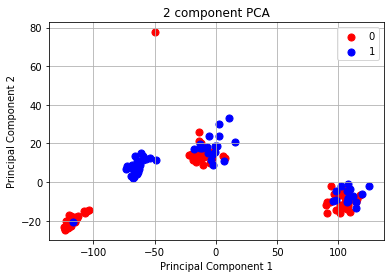

In [5]:
# PCA visualization:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')
labels = [0, 1]
colors = ['r', 'b']
for label, color in zip(labels, colors):
    indicesToKeep = pca_df['label'] == label
    ax.scatter(pca_df.loc[indicesToKeep, 'component1']
               , pca_df.loc[indicesToKeep, 'component2']
               , c = color
               , s = 50)
ax.grid()
ax.legend(labels)
plt.show()

In [6]:
# TSNE:
tsne = TSNE(n_components=2).fit_transform(X_train)

tsne_df = pd.DataFrame(data = tsne, columns = ['component1', 'component2'])

tsne_df = pd.concat([tsne_df, pd.DataFrame(Y_train, columns = ['label'])], axis = 1)

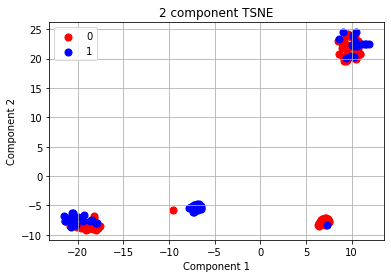

In [7]:
# TSNE visualization
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1) 
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('2 component TSNE')
for label, color in zip(labels, colors):
    indicesToKeep = tsne_df['label'] == label
    ax2.scatter(tsne_df.loc[indicesToKeep, 'component1']
               , tsne_df.loc[indicesToKeep, 'component2']
               , c = color
               , s = 50)
ax2.grid()
ax2.legend(labels)
plt.show()
